In [2]:
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_optimization.problems.variable import Variable
from graph_helper import *
from QiskitMaxcut import *
from sympy import * 

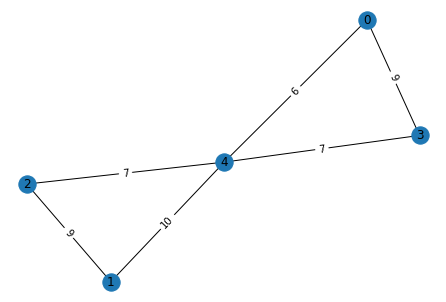

In [19]:
graph = generate_butterfly_graph(with_weights=True)
max_cut = Maxcut(graph)
max_cut_problem = max_cut.to_quadratic_program()
max_cut.draw()

In [20]:
print(max_cut_problem)

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max-cut

Maximize
 obj: 15 x_0 + 19 x_1 + 16 x_2 + 16 x_3 + 30 x_4 + [ - 36 x_0*x_3 - 24 x_0*x_4
      - 36 x_1*x_2 - 40 x_1*x_4 - 28 x_2*x_4 - 28 x_3*x_4 ]/2
Subject To

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1

Binaries
 x_0 x_1 x_2 x_3 x_4
End



In [21]:
conv_toQubo = QuadraticProgramToQubo()

In [22]:
conv_toQubo.is_compatible(max_cut_problem)

True

In [23]:
mac_cut_qubo = conv_toQubo.convert(max_cut_problem)

In [24]:
mac_cut_qubo

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max-cut

Minimize
 obj: - 15 x_0 - 19 x_1 - 16 x_2 - 16 x_3 - 30 x_4 + [ 36 x_0*x_3 + 24 x_0*x_4
      + 36 x_1*x_2 + 40 x_1*x_4 + 28 x_2*x_4 + 28 x_3*x_4 ]/2
Subject To

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1

Binaries
 x_0 x_1 x_2 x_3 x_4
End

In [3]:
 x0, x1, x2, x3, x4 = symbols('x0 x1 x2 x3 x4')

In [4]:
x = Matrix([x0, x1, x2, x3, x4])
x

Matrix([
[x0],
[x1],
[x2],
[x3],
[x4]])

In [7]:
# könnte Q-Matrix für DWave sein 
Q = Matrix([[-15, 0, 0, 36, 24],[0, -19, 36, 0, 40],[0, 0, -16, 0, 28],[0, 0, 0, -16, 28],[0, 0, 0, 0, -30]])
Q

Matrix([
[-15,   0,   0,  36,  24],
[  0, -19,  36,   0,  40],
[  0,   0, -16,   0,  28],
[  0,   0,   0, -16,  28],
[  0,   0,   0,   0, -30]])

In [6]:
x.T * Q * x

Matrix([[-15*x0**2 - 19*x1**2 + x2*(36*x1 - 16*x2) + x3*(36*x0 - 16*x3) + x4*(24*x0 + 40*x1 + 28*x2 + 28*x3 - 30*x4)]])